In [15]:
import pandas as pd

# Leggi il file di testo come una serie di blocchi
with open('hundredResults.txt', 'r') as file:
	blocks = file.read().split('==============================')

# Inizializza una lista per contenere i risultati
results = []

# Estrai le informazioni rilevanti da ciascun blocco
for block in blocks:
	pattern = r"(\w+) vs (\w+) Final results:\s+(\w+)\s+Score: (\d+), Won: (\d+), Lost: (\d+), Draw: (\d+), Error: (\d+)\s+(\w+)\s+Score: (\d+), Won: (\d+), Lost: (\d+), Draw: (\d+), Error: (\d+)"
	match = results.search(pattern, block)
	if match:
		player1, opponent, player2, score1, won1, lost1, draw1, error1, player3, score2, won2, lost2, draw2, error2 = match.groups()
		results.append([player1, opponent, score1, won1, lost1, draw1, error1])
		results.append([opponent, player1, score2, won2, lost2, draw2, error2])
	else:
		print(f"No match found in block:\n{block}\n")

# Crea un DataFrame pandas
df = pd.DataFrame(results, columns=['Opponent', 'Player', 'Score', 'Won', 'Lost', 'Draw', 'Error'])

# Converte le colonne numeriche al tipo di dati corretto
for col in ['Score', 'Won', 'Lost', 'Draw', 'Error']:
	df[col] = df[col].astype(int)

# Raggruppa i risultati per giocatore e avversario
grouped = df.groupby(['Player', 'Opponent']).sum()

print(grouped)

No match found in block:


                 Score  Won  Lost  Draw  Error
Player Opponent                               
Bob    L0          146   44     0    14     12
       L1           86   18     7    32     13
Bob2   L0          120   39     0     3     28
       L1           21    5     0     6     59
Bob3   L0          168   53     0     9      8
       L1          116   30     0    26     14
Bob31  L0          148   47     8     7      8
       L1           69   15    23    24      8
Bob3e  L0          151   45     1    16      8
       L1          101   25    11    26      8
Bob4   L0          165   50     2    15      3
       L1          117   29     4    30      7
L0     Bob          50    0    44    14      0
       Bob2         87    0    39     3      0
       Bob3         33    0    53     9      0
       Bob31        55    8    47     7      0
       Bob3e        43    1    45    16      0
       Bob4         30    2    50    15      0
L1     Bob          92    7    18

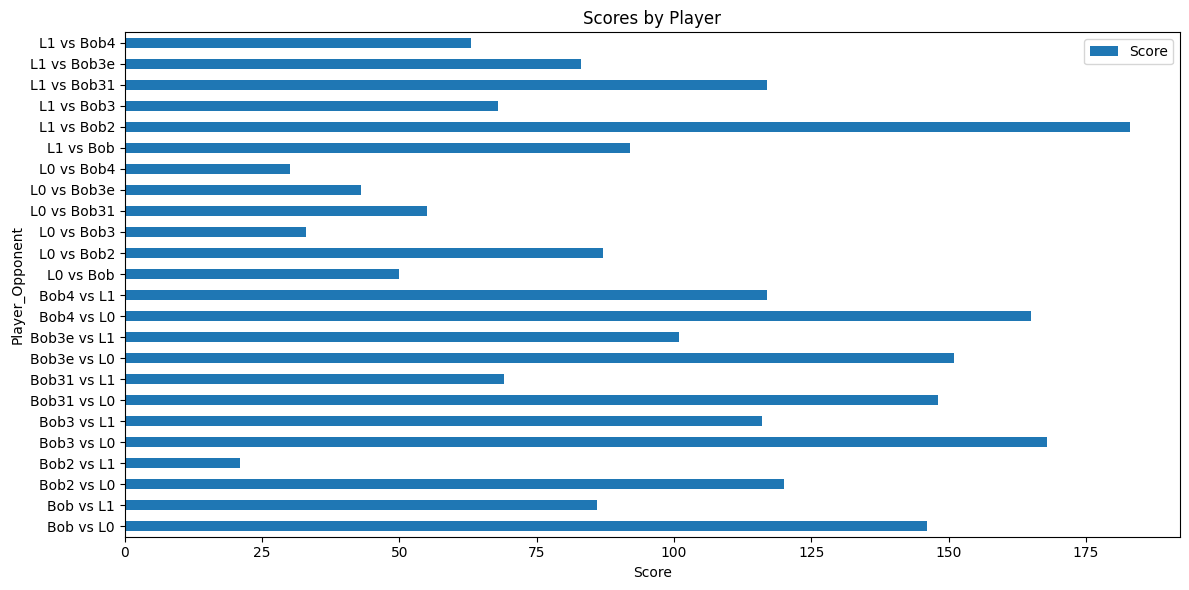

In [16]:
import matplotlib.pyplot as plt

# Assuming 'grouped' is your DataFrame
grouped = grouped.reset_index()  # Reset index to use 'Player' and 'Opponent' in the plot

# Create a new column for Player and Opponent combined (for display on x-axis)
grouped['Player_Opponent'] = grouped['Player'] + ' vs ' + grouped['Opponent']

# Plotting
grouped.plot(x='Player_Opponent', y='Score', kind='barh', figsize=(12, 6))
plt.title('Scores by Player')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

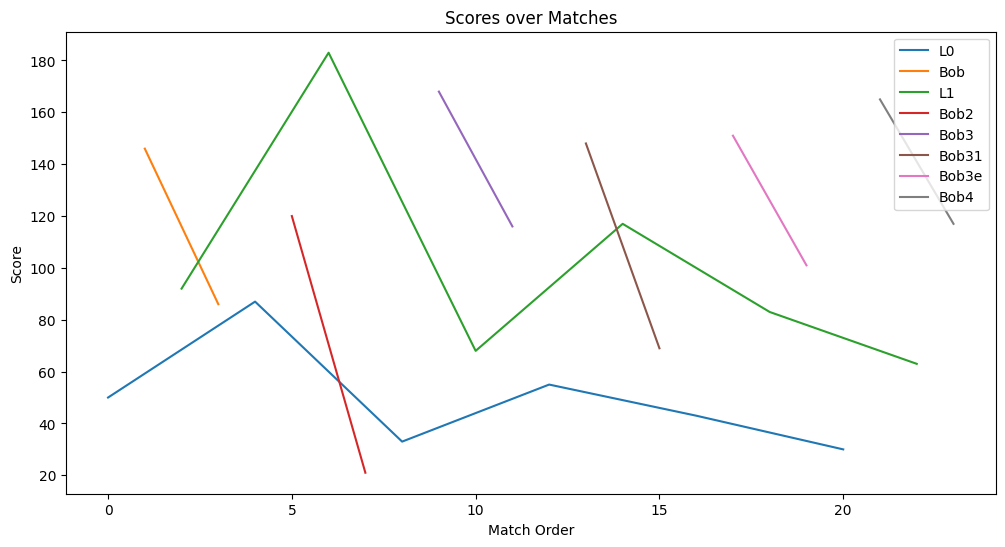

In [17]:
import matplotlib.pyplot as plt

# Crea il grafico
plt.figure(figsize=(12, 6))
for player in df['Player'].unique():
	player_data = df[df['Player'] == player]
	plt.plot(player_data.index, player_data['Score'], label=player)
plt.title('Scores over Matches')
plt.xlabel('Match Order')
plt.ylabel('Score')
plt.legend()
plt.show()

# Bob's a confronto con L0 ed L1

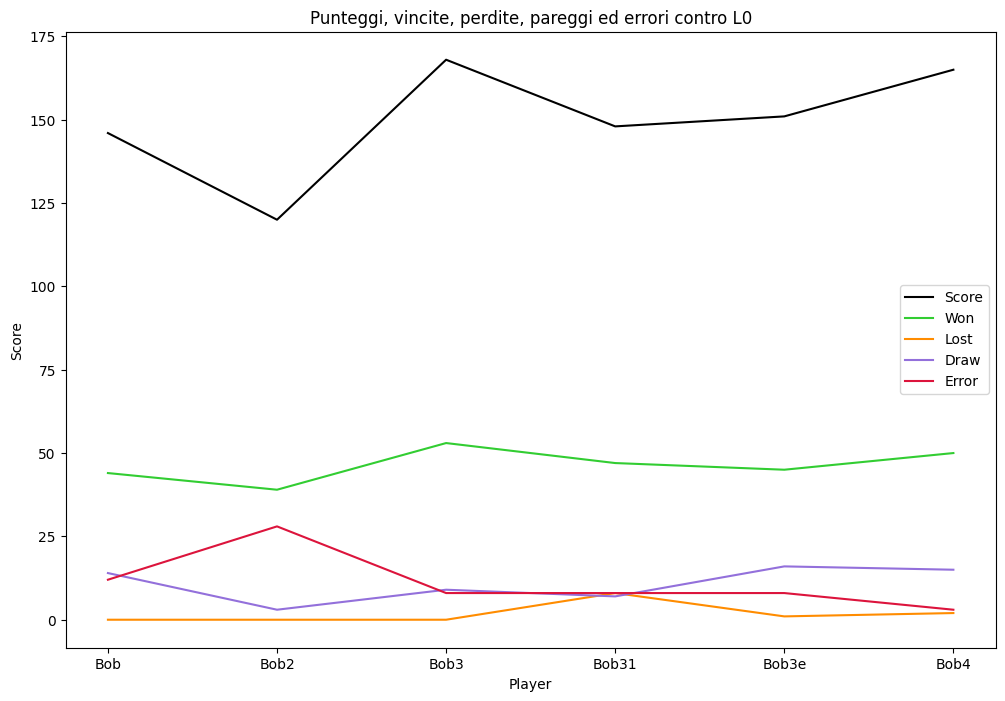

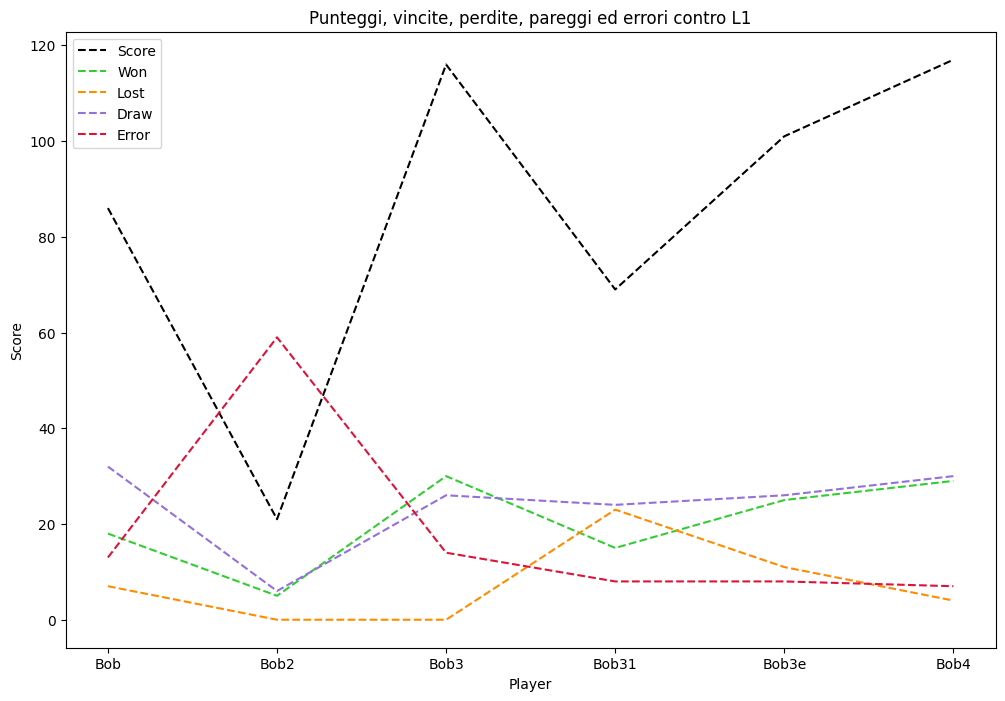

In [42]:
import matplotlib.pyplot as plt

# Filter the DataFrame for opponents L0 and L1
df_L0 = df[df['Opponent'] == 'L0']
df_L1 = df[df['Opponent'] == 'L1']

list = ['Score', 'Won', 'Lost', 'Draw', 'Error']
colors = ['black', 'limegreen', 'darkorange', 'mediumpurple', 'crimson']  # Define a list of colors

fig, ax = plt.subplots(figsize=(12,8))
fig, pl = plt.subplots(figsize=(12,8))

for i, element in enumerate(list):
	# Calculate the total score for each player against L0 and L1
	scores_L0 = df_L0.groupby('Player')[element].sum()
	scores_L1 = df_L1.groupby('Player')[element].sum()

	# Create a line for each element
	ax.plot(scores_L0.index, scores_L0, color=colors[i], label=element)
	pl.plot(scores_L1.index, scores_L1, color=colors[i], linestyle='dashed', label=element)

ax.set_xlabel('Player')
ax.set_ylabel('Score')
ax.set_title('Punteggi, vincite, perdite, pareggi ed errori contro L0')
ax.legend()

pl.set_title('Punteggi, vincite, perdite, pareggi ed errori contro L1')
pl.set_xlabel('Player')
pl.set_ylabel('Score')
pl.legend()	
plt.show()

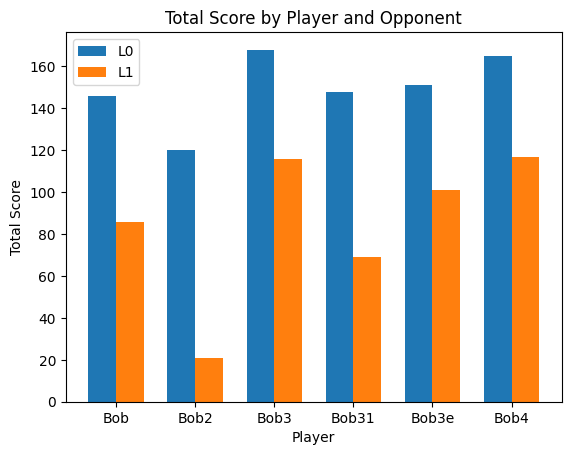

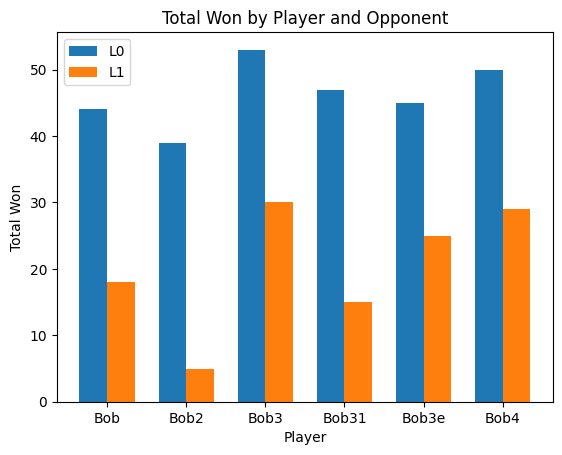

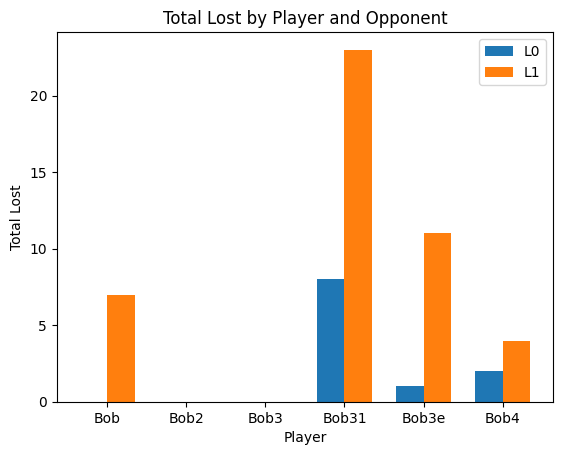

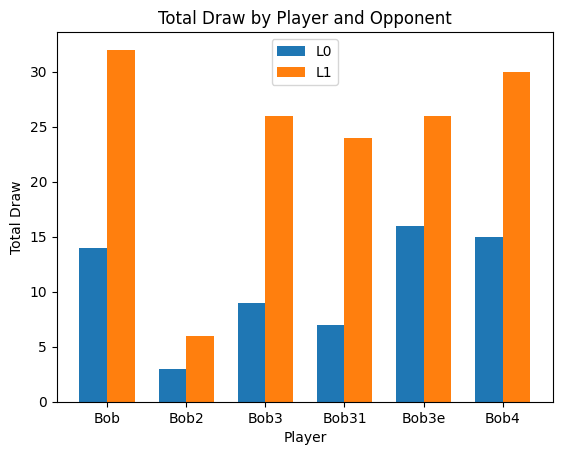

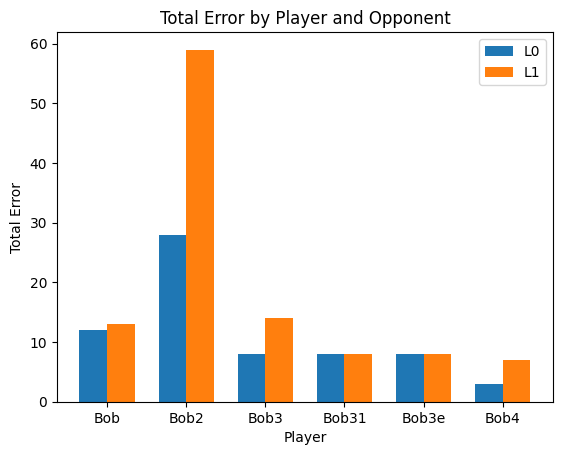

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra il DataFrame per gli avversari L0 e L1
df_L0 = df[df['Opponent'] == 'L0']
df_L1 = df[df['Opponent'] == 'L1']

list = ['Score', 'Won', 'Lost', 'Draw', 'Error']

for element in list:
# Calcola il punteggio totale per ciascun giocatore contro L0 e L1
	scores_L0 = df_L0.groupby('Player')[element].sum()
	scores_L1 = df_L1.groupby('Player')[element].sum()

	# Crea un grafico a barre
	fig, ax = plt.subplots()

	bar_width = 0.35
	index = np.arange(len(scores_L0))

	bar1 = ax.bar(index, scores_L0, bar_width, label='L0')
	bar2 = ax.bar(index + bar_width, scores_L1, bar_width, label='L1')

	ax.set_xlabel('Player')
	ax.set_ylabel('Total '+element)
	ax.set_title('Total '+element+' by Player and Opponent')
	ax.set_xticks(index + bar_width / 2)
	ax.set_xticklabels(scores_L0.index)
	ax.legend()

	plt.show()